K-means clustering for customer segmentation

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset used(https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [112]:
cd = pd.read_csv('Mall_Customers.csv')

In [113]:
cd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [114]:
cd.shape

(200, 5)

In [115]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [116]:
cd.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [117]:
numeric_columns = cd.select_dtypes(include=['float64', 'int64']).columns
numeric_data = cd[numeric_columns]

correlation_matrix = numeric_data.corr()

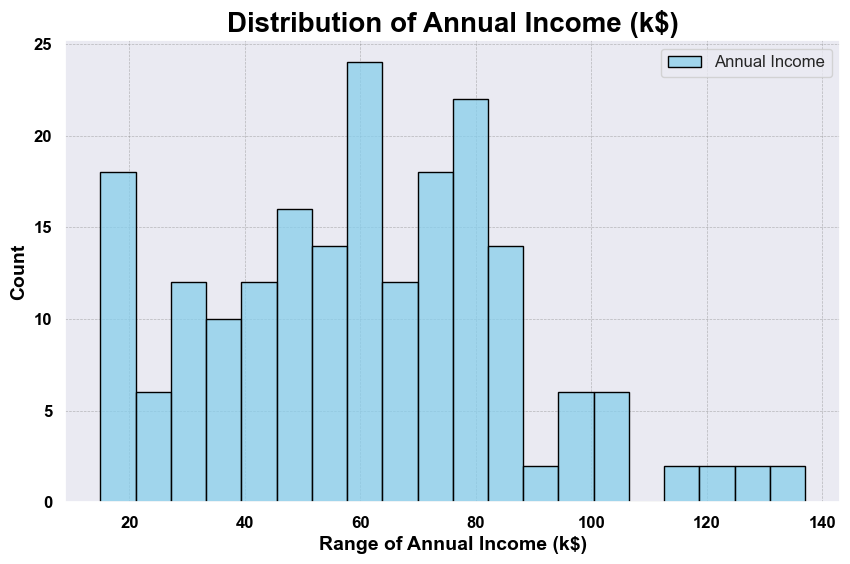

In [118]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.histplot(cd['Annual Income (k$)'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of Annual Income (k$)', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Range of Annual Income (k$)', fontsize=14, fontweight='bold', color='black')  
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(['Annual Income'], loc='upper right', fontsize=12)
plt.show()

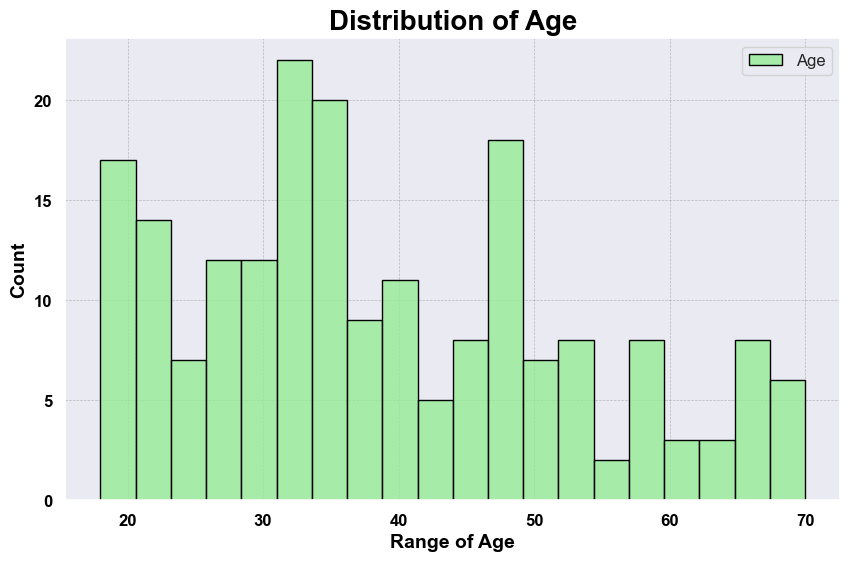

In [119]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.histplot(cd['Age'], color='lightgreen', edgecolor='black', bins=20)
plt.title('Distribution of Age', fontsize=20, fontweight='bold', color='black')  
plt.xlabel('Range of Age', fontsize=14, fontweight='bold', color='black') 
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')  
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(['Age'], loc='upper right', fontsize=12)
plt.show()

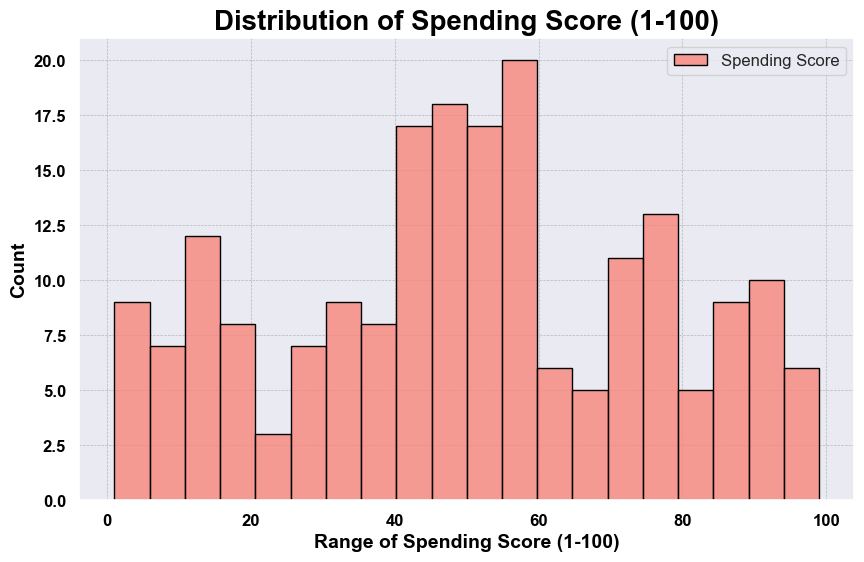

In [120]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.histplot(cd['Spending Score (1-100)'], color='salmon', edgecolor='black', bins=20)
plt.title('Distribution of Spending Score (1-100)', fontsize=20, fontweight='bold', color='black')  
plt.xlabel('Range of Spending Score (1-100)', fontsize=14, fontweight='bold', color='black') 
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black') 
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(['Spending Score'], loc='upper right', fontsize=12)
plt.show()

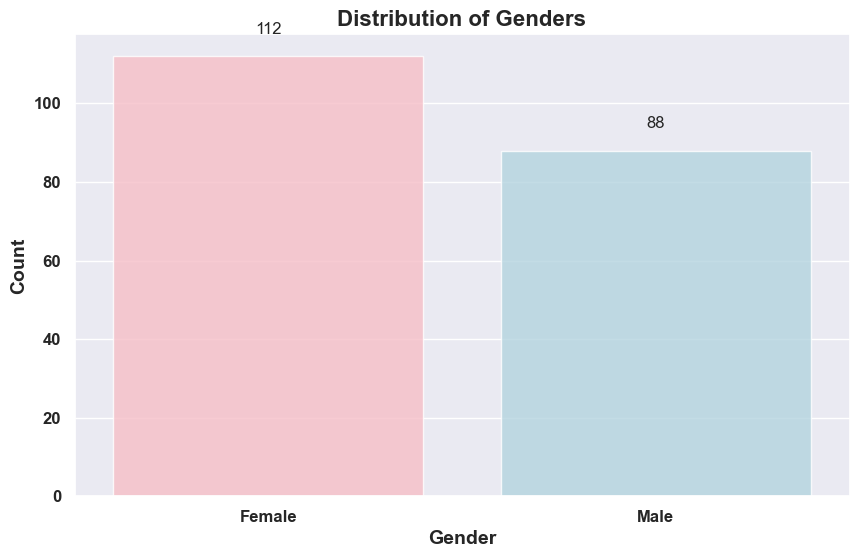

In [121]:
genders = cd['Gender'].value_counts()
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
custom_colors = {'Male': 'lightblue', 'Female': 'lightpink'}
sns.barplot(x=genders.index, y=genders.values, hue=genders.index, palette=custom_colors, alpha=0.8, dodge=False)
for i, value in enumerate(genders.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genders', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend([], [], frameon=False)
plt.show()

In [122]:
df1=cd[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [123]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


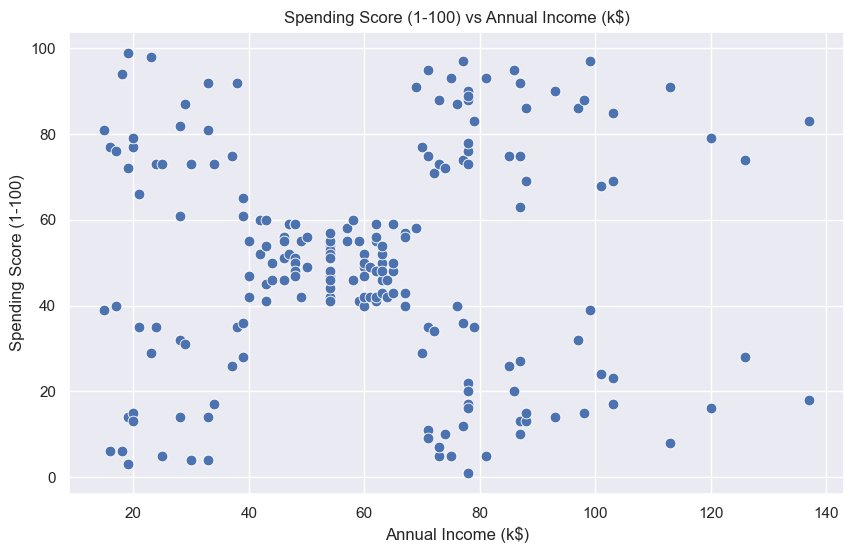

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [125]:
X = cd.iloc[:,[3,4]].values

In [126]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [127]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

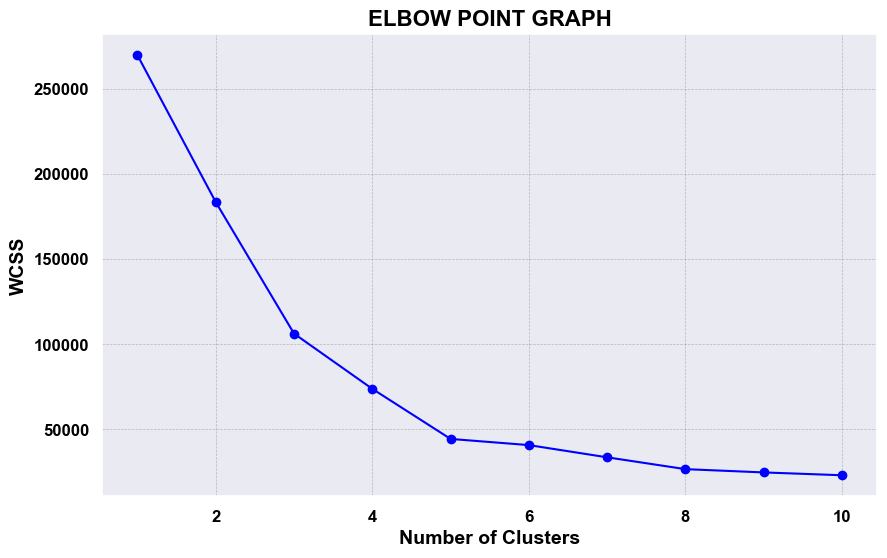

In [128]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('ELBOW POINT GRAPH', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold', color='black')
plt.ylabel('WCSS', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

In [129]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


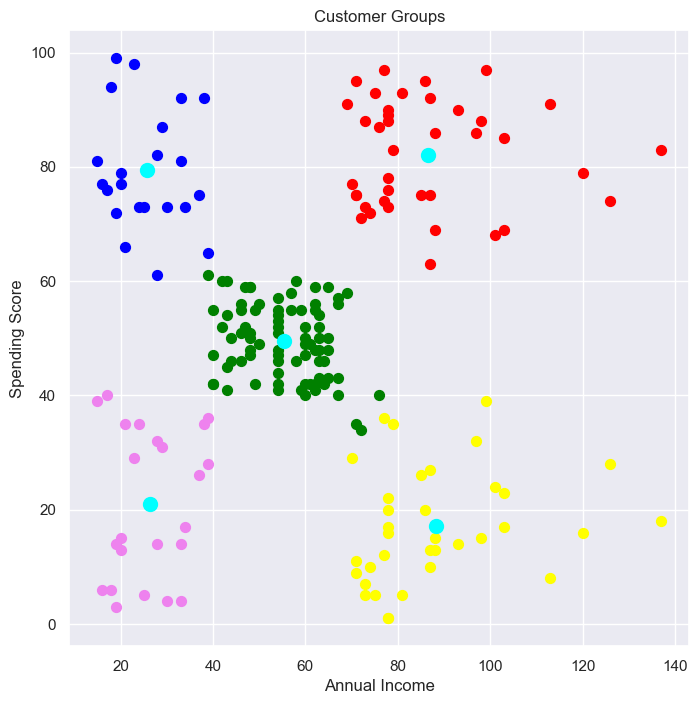

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

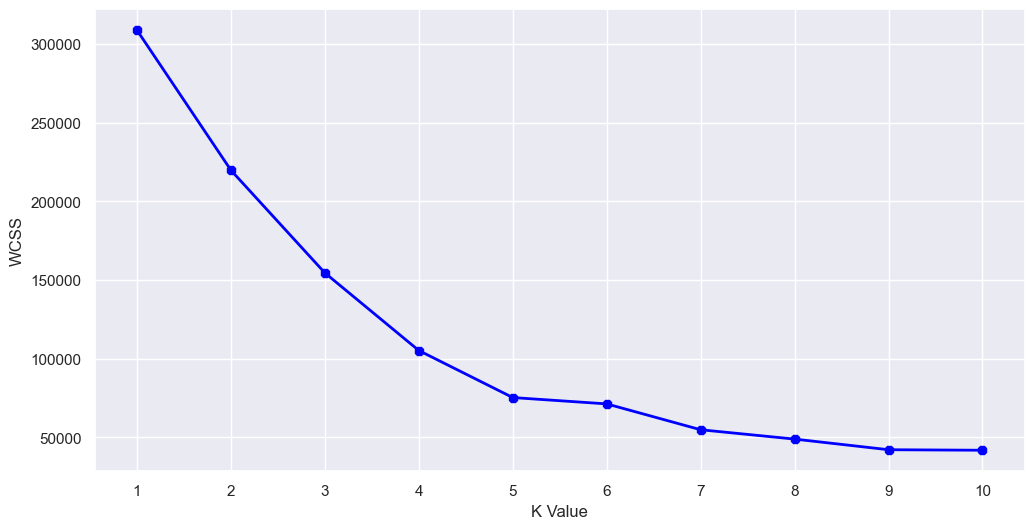

In [131]:
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#WCSSfor different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [132]:
#k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = kmeans.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,6
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,6


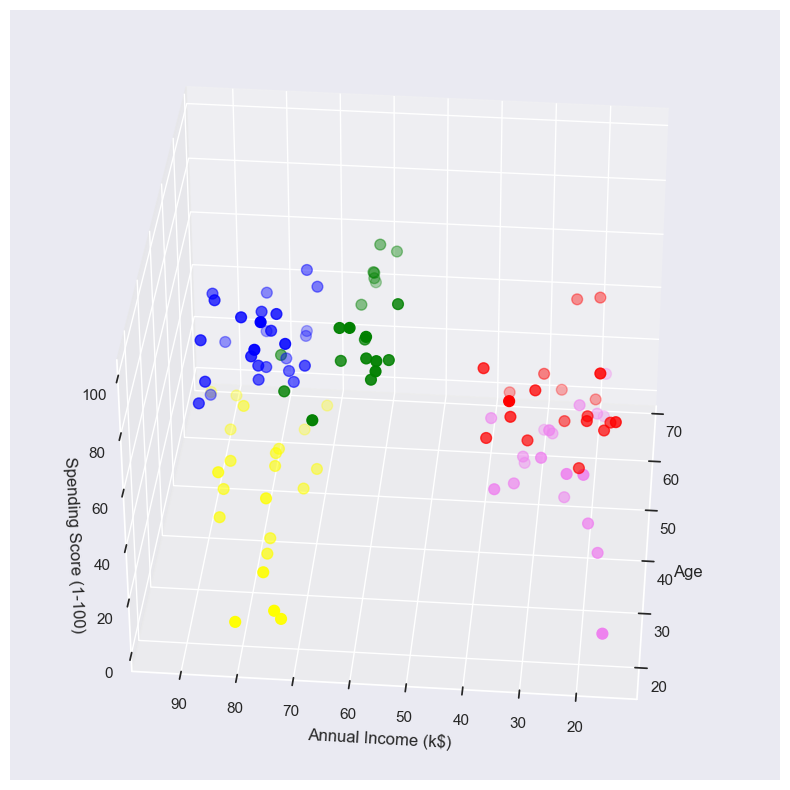

In [133]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='green', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='yellow', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='violet', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='blue', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [134]:
cust1=df1[df1["label"]==1]
print('Customers in 1st group=', len(cust1))
print(cust1["CustomerID"].values)
print("--------------------------------------------------------------------------")
cust2=df1[df1["label"]==2]
print('Customers in 2nd group=', len(cust2))
print(cust2["CustomerID"].values)
print("--------------------------------------------------------------------------")
cust3=df1[df1["label"]==0]
print('Customers in 3rd group=', len(cust3))
print(cust3["CustomerID"].values)
print("--------------------------------------------------------------------------")
cust4=df1[df1["label"]==3]
print('Customers in 4th group=', len(cust4))
print(cust4["CustomerID"].values)
print("--------------------------------------------------------------------------")
cust5=df1[df1["label"]==4]
print('Customers in 5th group=', len(cust5))
print(cust5["CustomerID"].values)
print("--------------------------------------------------------------------------")

Customers in 1st group= 20
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 30 32 34 36 38 40 42]
--------------------------------------------------------------------------
Customers in 2nd group= 22
[129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179]
--------------------------------------------------------------------------
Customers in 3rd group= 21
[ 87  90  91  93  97  99 102 103 105 107 108 109 110 111 117 118 119 120
 127 147 161]
--------------------------------------------------------------------------
Customers in 4th group= 19
[ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
--------------------------------------------------------------------------
Customers in 5th group= 28
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------------------------------------
